# Frequency Response of an LRC Circuit

Simulate the behavior of a driven LRC circuit with $R$=23$\Omega$, $C$=654nF and $L$=3.2mH.

The LRC circuit can be treated as a voltage divider with complex impedances $Z_R = R$, $Z_C = 1 / (i \omega C)$ and $Z_L=i\omega{}L$. The voltage across one of the components $R,C,L$ is then given by:
$$
  U_{R,C,L} = U_0 \frac{Z_{R,C,L}}{Z_R + Z_C + Z_L}
$$
where $U_0$ is the output voltage of the voltage source. Because $Z_C$ and $Z_L$ depend on the frequency, this calculation cannot be done in the time domain, but only in the frequency domain.

In [2]:
import numpy as np
from numpy import sin,cos,log,log10
import matplotlib.pyplot as plt

R = 23     # ohm
C = 654e-9 # farad
L = 3.2e-3 # henry

nsamples = 1024  # number of samples
fsamp = 1000000  # sampling rate

## Fourier spectrum (4 points)

Apply a discrete fourier transform to the following time-descrete signals with 1024 samples taken at a sampling rate of 1 MHz:

- sinusiodal signals $U_0(t) = \sin ( 2 \pi f t )$ with frequencies of 90 kHz and 125 kHz
- square wave signals with frequencies of 15625 Hz and 20000 Hz

Plot the Fourier spectrum of these signals.

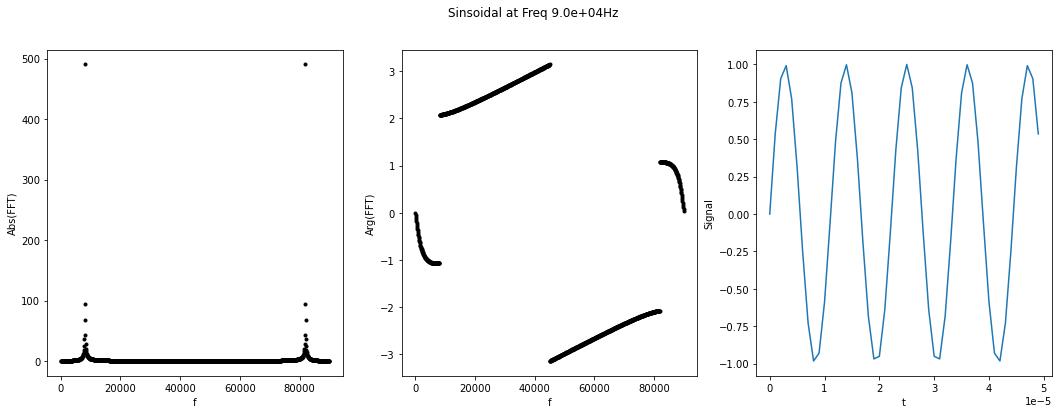

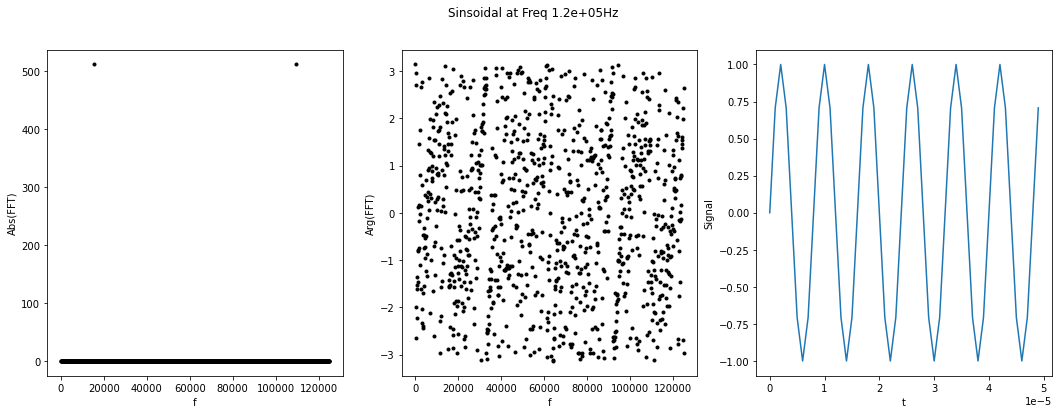

In [3]:
plt.rcParams['figure.figsize'] = [18, 6]
#plt.rcParams['figure.dpi'] = 150

def sinusoidal(t, f):
    return np.sin(2*np.pi*f*t)


f_options = [90e3,125e3]

t = np.fromiter((n / fsamp for n in range(nsamples)), float)

for f in f_options:
    
    fig, axs = plt.subplots(1, 3)
    samples = sinusoidal(t, f)

    output = np.fft.fft(samples)
    #freqs = np.fft.fftfreq(t.shape[-1])
    freqs = np.arange(nsamples) / nsamples * f

    axs[0].plot(freqs, np.abs(output), 'ko', lw=0, ms=3)
    axs[0].set_xlabel("f")
    axs[0].set_ylabel("Abs(FFT)")
    
    axs[1].plot(freqs, np.angle(output),'ko',lw=0, ms=3)
    axs[1].set_xlabel("f")
    axs[1].set_ylabel("Arg(FFT)")
    
    axs[2].plot(t[0:50], samples[0:50])
    axs[2].set_xlabel("t")
    axs[2].set_ylabel("Signal")
    
    fig.suptitle(f"Sinsoidal at Freq {f:.1e}Hz")

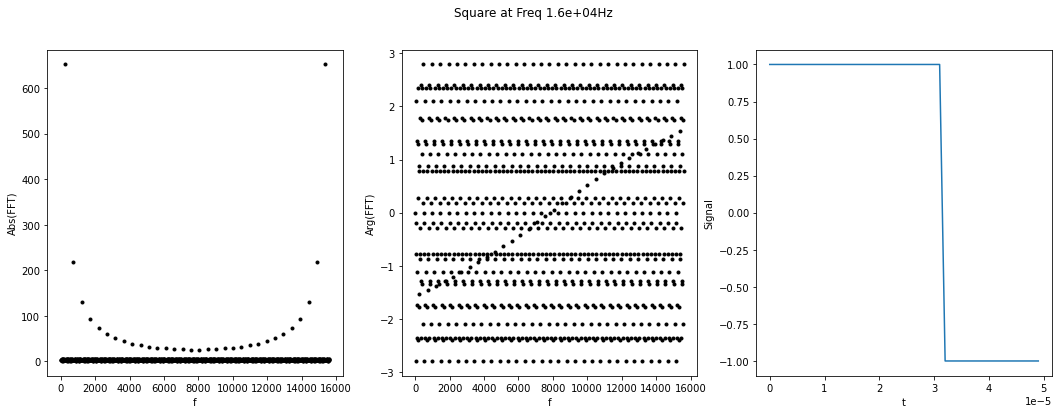

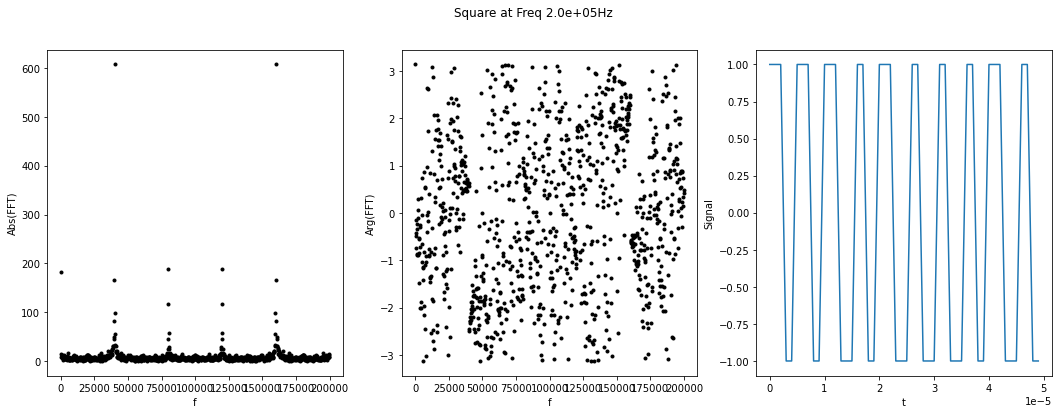

In [4]:
def square(t, f):
    delta = 1 / f
    gap = delta / 2
    if t % delta < gap:
        return 1
    return -1

t = np.fromiter((n / fsamp for n in range(nsamples)), float)

f_options = [15625, 200e3]
vec_square = np.vectorize(square)

for i, f in enumerate(f_options):
    
    fig, axs = plt.subplots(1, 3)
    samples = vec_square(t, f)

    output = np.fft.fft(samples)
    freqs = np.arange(nsamples) / (nsamples) * f

    axs[0].plot(freqs, np.abs(output), 'ko', lw=0, ms=3)
    axs[0].set_xlabel("f")
    axs[0].set_ylabel("Abs(FFT)")
    
    axs[1].plot(freqs, np.angle(output),'ko',lw=0, ms=3)
    axs[1].set_xlabel("f")
    axs[1].set_ylabel("Arg(FFT)")
    
    axs[2].plot(t[0:50], samples[0:50])
    axs[2].set_xlabel("t")
    axs[2].set_ylabel("Signal")

    fig.suptitle(f"Square at Freq {f:.1e}Hz")

Discuss the Fourier spectra of the four signals from the previous question.

In the sinusoidal examples, you can see a peak in the location of the frequency set for the signal in the real part. 
In the square examples, each example is made up of multiple frequencies. The lower frequency square wave is constructed of multiple frequencies.
The higher frequency square wave only consists of a small number of frequencies and this can be seen in the samples taken. On the right side, you can see that the data sampled isn't very square with some sharp oscillations.  This makes it a simpler shape to model with fewer sinusoidal functions in comparison to the other sqaure function.

For both square and sinusoidal, the values are complex conjugated near the middle between 0 and the frequency of the signal.

For values with zero real parts, the corresponding complex values have no distinct pattern. 

## Circuit analysis (3 points)

Determine the ratios of the voltages across resistor ($U_R/U_0$), capacitor ($U_C/U_0$) and inductor ($U_L/U_0$) to the input voltage in the frequency domain. Visualize your results. For which frequencies are the voltage amplitudes over resistor, capacitor and inductor maximal?

In [5]:
def Z_C(omega):
    return 1 / (1j * omega * C)

def Z_L(omega):
    return 1j * omega * L 

def Z_sum(omega):
    return R + Z_L(omega) + Z_C(omega)

def U_R_ratio(omega):
    return R / Z_sum(omega)

def U_L_ratio(omega):
    return Z_L(omega) / Z_sum(omega)

def U_C_ratio(omega):
    return Z_C(omega) / Z_sum(omega)

Achieved max R ratio of 1.0e+00 at omega=2.2e+04
Achieved max C ratio of 3.1e+00 at omega=2.1e+04
Achieved max L ratio of 3.1e+00 at omega=2.2e+04


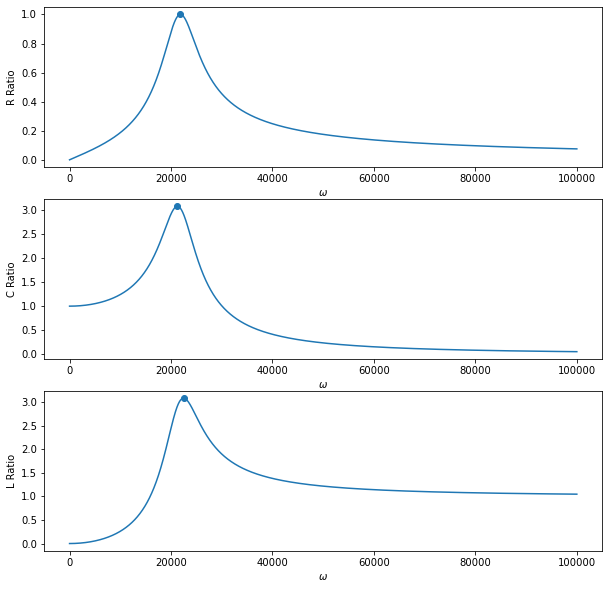

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,10))
omega = np.linspace(1, 1e5, 10000)

labels = ["R","C","L"]
ratio_funcs = [U_R_ratio, U_C_ratio, U_L_ratio]
max_omega_list = []
for i, (func, label) in enumerate(zip(ratio_funcs, labels)):
    mag = abs(func(omega))
    axs[i].plot(omega, mag)
    axs[i].set_xlabel(r"$\omega$")
    axs[i].set_ylabel(f"{label} Ratio")
    
    max_mag = np.max(mag)
    max_omega = omega[np.where(mag == max_mag)][0]
    max_omega_list.append(max_omega)
    print(f"Achieved max {label} ratio of {max_mag:.1e} at omega={max_omega:.1e}")
    
    axs[i].scatter(max_omega,max_mag)
plt.show()

# SET THESE VARIABLE TO THE FREQUENCIES WHERE THE RESPECTIVE VOLTAGE IS MAXIMAL
frmax = max_omega_list[0]
fcmax = max_omega_list[1] 
flmax = max_omega_list[2]

In [7]:
assert(frmax>0)

In [8]:
assert(fcmax>0)
assert(flmax>0)

## Signals in the time domain (3 points)

Calculate the voltages across resistor, capacitor and inductor in the time domain, i.e. as a function of time. Visualize your results for several sinusoidal and square waveforms that you find interesting.

Briefly describe the frequency dependence of the voltages in the circuit. Can you spot any unexpected features?

In [8]:
def U_0_fft(func, *args):
    # Give the fft of a function
    t = np.fromiter((n / fsamp for n in range(nsamples)), float)
    samples = func(t, *args)
    output = np.fft.fft(samples)
    return output

def U_R(omega, func, *args):
    return np.fft.ifft(U_0_fft(func, *args) * U_R_ratio(omega))

def U_L(omega, func, *args):
    return np.fft.ifft(U_0_fft(func, *args) * U_L_ratio(omega))

def U_C(omega, func, *args):
    return np.fft.ifft(U_0_fft(func, *args) * U_C_ratio(omega))

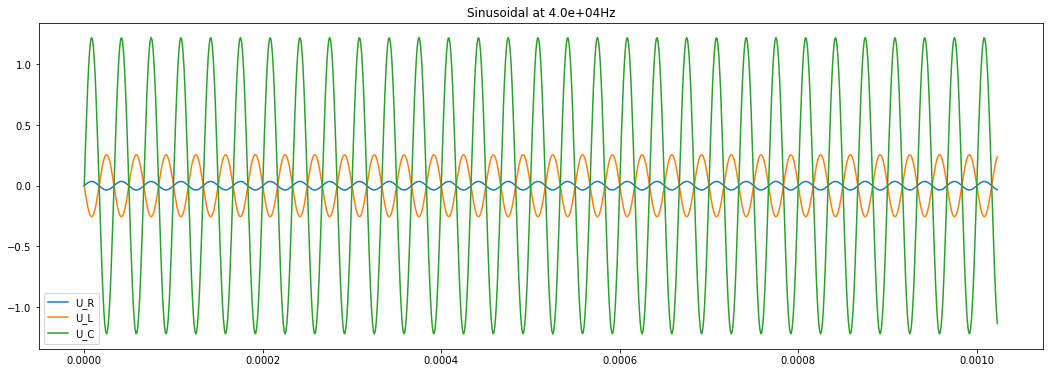

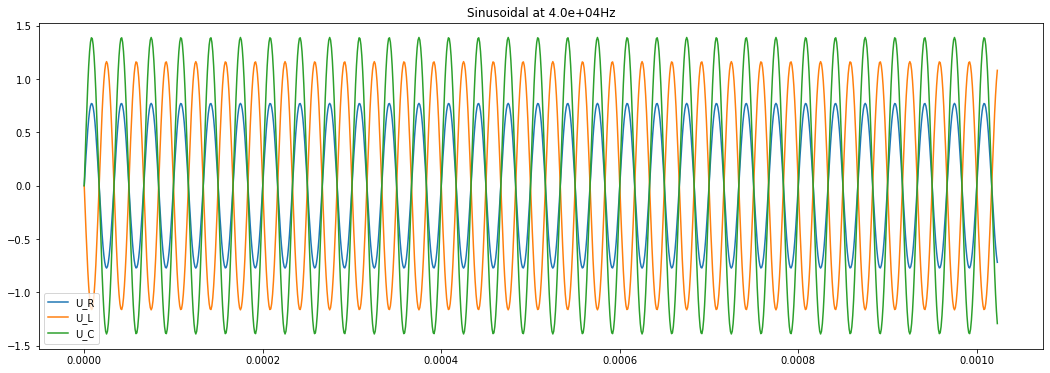

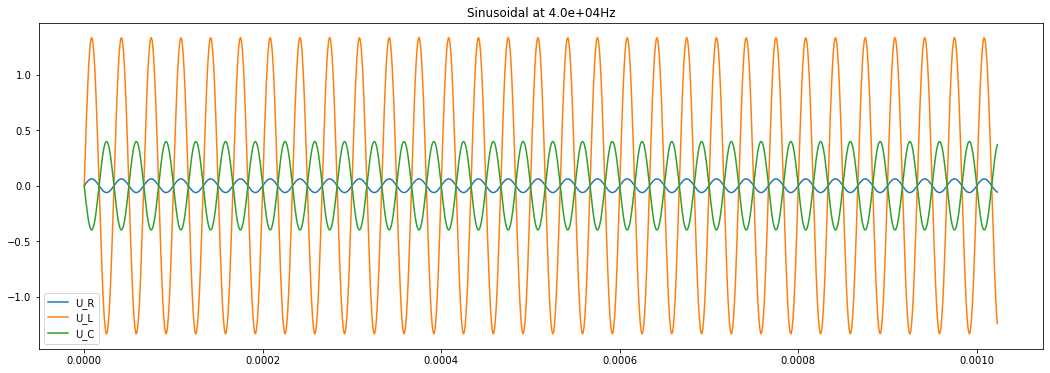

In [12]:
for o in [10e3, 20e3, 40e3]:
    for U_i in [U_R, U_L, U_C]:
        results = U_i(o, sinusoidal, 30e3)
        plt.plot(t, results.real, label=f"{U_i.__name__}") 
    # plt.plot(t, vec_square(t, 2e3), label="Signal")
    plt.title(f"Sinusoidal at {omega:.1e}Hz")
    plt.legend()
    plt.show()

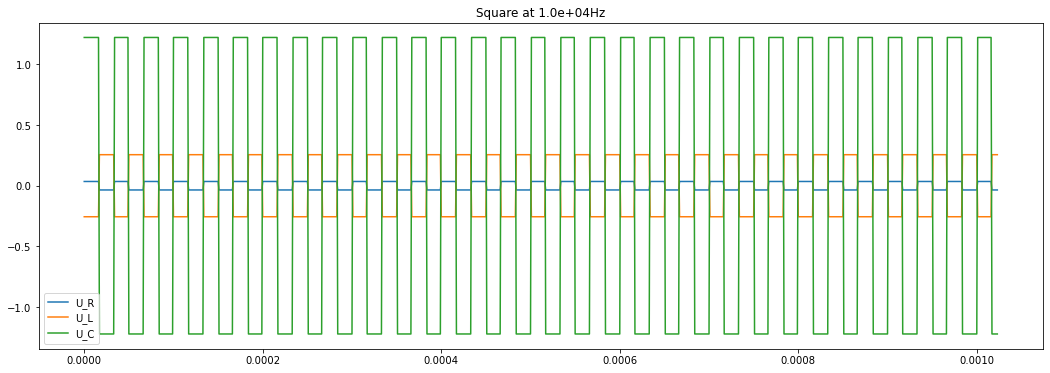

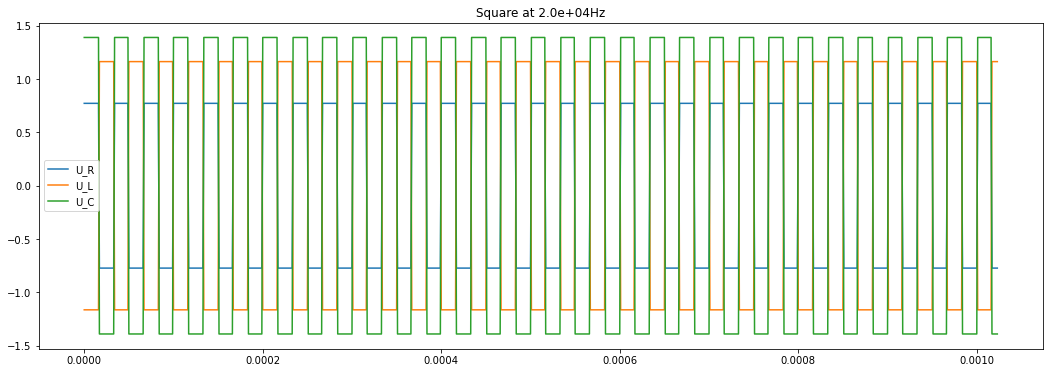

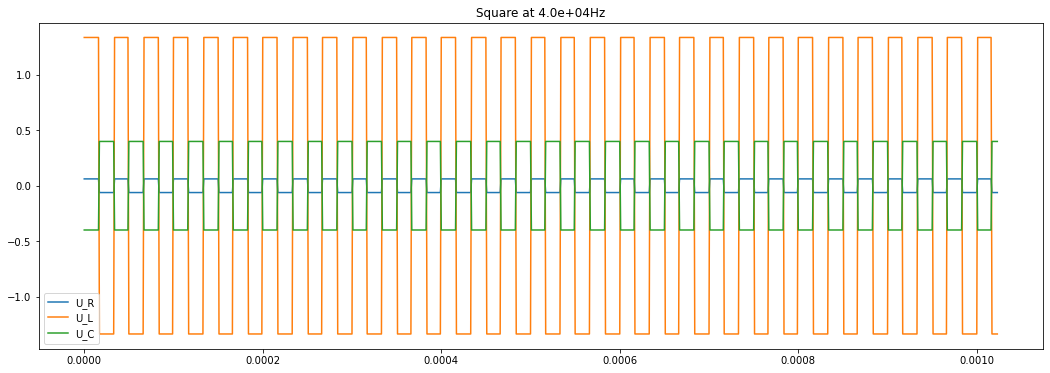

In [59]:
for omega in [10e3, 20e3, 40e3]:
    for U_i in [U_R, U_L, U_C]:
        results = U_i(omega, vec_square, 30e3)
        plt.plot(t, results.real, label=f"{U_i.__name__}") 
    plt.title(f"Square at {omega:.1e}Hz")
    plt.legend()
    plt.show()

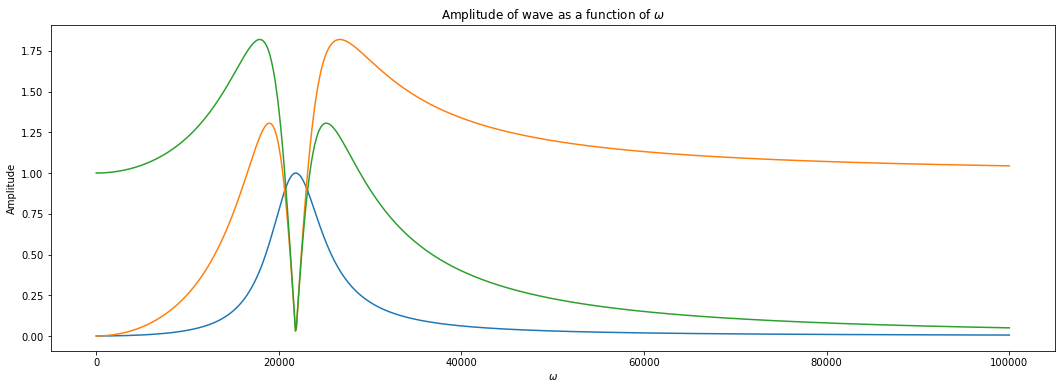

In [49]:
test_omega = np.linspace(1, 1e5, 1000)
results_R = [max(U_R(omega, sinusoidal, 90e3).real) for omega in test_omega] 
results_L = [max(U_L(omega, sinusoidal, 90e3).real) for omega in test_omega]
results_C = [max(U_C(omega, sinusoidal, 90e3).real) for omega in test_omega]
plt.plot(test_omega, results_R, label="R")
plt.plot(test_omega, results_L, label="C")
plt.plot(test_omega, results_C, label="L")
plt.title(r"Amplitude of wave as a function of $\omega$")
plt.xlabel(r"$\omega$")
plt.ylabel("Amplitude")
plt.show()

The amplitude response of the wave as a function of the frequency looks similar to that of the values for the ratios. This is just the absolute value due to taking the max of the signal instead of the min.